In [1]:
# %matplotlib qt
%matplotlib widget
%load_ext autoreload
%autoreload 2
from uedge import *
from uedge.hdf5 import *
import uedge_mvu.plot as mp
import uedge_mvu.utils as mu
import uedge_mvu.tstep as mt
from uedge.rundt import rundt, UeRun
import uedge_dcp.mastu_uedge_settings as us
import uedge_dcp.plotting as dp
import uedge_dcp.post_processing as pp
from uedge.uedge_lists import *
from uedge_dcp.gridue_manip import interpolate_save, UESave
import time
import matplotlib.pyplot as plt
import os
import numpy as np
import UEDGE_utils
import matplotlib.pyplot as plt
import freeqdsk
    
ev = bbb.ev

In [2]:
list_variable("rsigpl")

Package:    bbb
Group:      Poten
Attributes: Poten input 
Type:       double
Address:    4748544440
Unit:       
Comment:
ad hoc radial electrical conductivity - global


In [ ]:
# dp.comparemesh("/Users/power8/Documents/04_mastu_modelling/2024_MASTU_shots/works_in_progress/analytic_SFs/analytic_SF75/gridfiles/gridue_44x18_R0_1", "/Users/power8/Documents/04_mastu_modelling/2024_MASTU_shots/works_in_progress/analytic_SFs/analytic_SF105/gridfiles/gridue_44x18_R0_1")

# dtrun = "/Users/power8/Documents/04_mastu_modelling/2024_MASTU_shots/works_in_progress/analytic_SFs/analytic_SF45/UEDGE/138x44/dtrun_last_ii2.hdf5"
dtrun = "/Users/power8/Documents/04_mastu_modelling/2024_MASTU_shots/works_in_progress/analytic_SFs/analytic_SF135/UEDGE/138x44/dtrun_last_ii2.hdf5"

# c = UeRun()
# c.convergenceanalysis(dtrun)
# c.failureanalysis(dtrun)
# 
s = UESave(dtrun)
dp.plotvar(s.vars["te"][:,:]/bbb.ev, rm=s.rm, zm = s.zm)

# Analytic SFs

In [ ]:
def psi_analytic(x,y,x0,y0,a0=0.1):
    
    dist_sq=((x-x0)**2 + (y-y0)**2)
    dist=np.sqrt(dist_sq)
    a0_sq=a0**2
    res = np.zeros(x.shape)
    res=np.log(dist)
    res[np.where(dist_sq < a0_sq)] = 0.5*(dist_sq[np.where(dist_sq < a0_sq)]/a0_sq -1.0)+np.log(a0)
    return res

def psi_analytic3(x,y,p1,p2,p3,i1,i2,i3):
    psi = i1 * psi_analytic(x,y,p1[0],p1[1])
    psi += i2 * psi_analytic(x,y,p2[0],p2[1])
    psi += i3 * psi_analytic(x,y,p3[0],p3[1])

    return psi

In [ ]:


with open("/Users/power8/Documents/04_mastu_modelling/UEDGE/Ingrid/mastu_49468-710/g049468.071025_modified", "r") as f:
    gf = freeqdsk.geqdsk.read(f)

# Create a SF 135
R0_offset = 10000
X = gf.r_grid + R0_offset
Y = gf.z_grid
p1=(1.0+R0_offset,gf.zmagx)
p2=(0.6+R0_offset,gf.zmagx-1.5)
p3=(1.4+R0_offset,gf.zmagx-1.5)
i1 = 0.05
i2 = 0.015
i3 = 0.02
psi = psi_analytic3(X,Y,p1,p2,p3,i1,i2,i3)

gf.psi = psi * (R0_offset + gf.rmagx) / gf.rmagx
gf.rbdry += R0_offset
gf.rlim += R0_offset
gf.rmagx = 1.0+R0_offset
gf.rleft += R0_offset
gf.rcentr += R0_offset
gfile_analytic = "/Users/power8/Documents/04_mastu_modelling/UEDGE/Ingrid/mastu_49468-710/g049468.071025_SF135"
with open(gfile_analytic, "w") as f:
    freeqdsk.geqdsk.write(gf,f)

fig,ax = plt.subplots(1)
ax.contour(X,Y,psi,levels=50)
ax.set_aspect("equal")


In [ ]:
with open("/Users/power8/Documents/04_mastu_modelling/UEDGE/Ingrid/mastu_49468-710/g049468.071025_modified", "r") as f:
    gf = freeqdsk.geqdsk.read(f)

# Create a SF 45
R0_offset = 10000
X = gf.r_grid + R0_offset
Y = gf.z_grid
p1=(1.0+R0_offset,gf.zmagx)
p2=(0.6+R0_offset,gf.zmagx-1.5)
p3=(1.4+R0_offset,gf.zmagx-1.5)
i1 = 0.05
i2 = 0.02
i3 = 0.015
psi = psi_analytic3(X,Y,p1,p2,p3,i1,i2,i3)

gf.psi = psi * (R0_offset + gf.rmagx) / gf.rmagx
gf.rbdry += R0_offset
gf.rlim += R0_offset
gf.rmagx = 1.0+R0_offset
gf.rleft += R0_offset
gf.rcentr += R0_offset
gfile_analytic = "/Users/power8/Documents/04_mastu_modelling/UEDGE/Ingrid/mastu_49468-710/g049468.071025_SF45"
with open(gfile_analytic, "w") as f:
    freeqdsk.geqdsk.write(gf,f)

fig,ax = plt.subplots(1)
c = ax.contour(X,Y,psi,levels=50)
fig.colorbar(c)
ax.set_aspect("equal")


In [ ]:
with open("/Users/power8/Documents/04_mastu_modelling/UEDGE/Ingrid/mastu_49468-710/g049468.071025_modified", "r") as f:
    gf = freeqdsk.geqdsk.read(f)

# Create a SF 165
R0_offset = 0
X = gf.r_grid + R0_offset
Y = gf.z_grid
p1=(1.0+R0_offset,gf.zmagx)
p2=(0.6+R0_offset,gf.zmagx-1.5)
p3=(1.4+R0_offset,gf.zmagx-1.5)
i1 = 1.5*0.05
i2 = 1.5*0.015
i3 = 1.5*0.0165
psi = psi_analytic3(X,Y,p1,p2,p3,i1,i2,i3)

gf.psi = psi * (R0_offset + gf.rmagx) / gf.rmagx
gf.rbdry += R0_offset
gf.rlim += R0_offset
gf.rmagx = 1.0+R0_offset
gf.rleft += R0_offset
gf.rcentr += R0_offset
gfile_analytic = "/Users/power8/Documents/04_mastu_modelling/UEDGE/Ingrid/mastu_49468-710/g049468.071025_SF165"
with open(gfile_analytic, "w") as f:
    freeqdsk.geqdsk.write(gf,f)

fig,ax = plt.subplots(1)
c = ax.contour(X,Y,psi,levels=50)
fig.colorbar(c)
ax.set_aspect("equal")


In [ ]:
with open("/Users/power8/Documents/04_mastu_modelling/UEDGE/Ingrid/mastu_49468-710/g049468.071025_modified", "r") as f:
    gf = freeqdsk.geqdsk.read(f)

# Create a SF 15
R0_offset = 100
X = gf.r_grid + R0_offset
Y = gf.z_grid
p1=(1.0+R0_offset,gf.zmagx)
p2=(0.6+R0_offset,gf.zmagx-1.5)
p3=(1.4+R0_offset,gf.zmagx-1.5)
i1 = 1.5*0.05
i2 = 1.5*0.0165
i3 = 1.5*0.015
psi = psi_analytic3(X,Y,p1,p2,p3,i1,i2,i3)

gf.psi = psi * (R0_offset + gf.rmagx) / gf.rmagx
gf.rbdry += R0_offset
gf.rlim += R0_offset
gf.rmagx = 1.0+R0_offset
gf.rleft += R0_offset
gf.rcentr += R0_offset
gfile_analytic = "/Users/power8/Documents/04_mastu_modelling/UEDGE/Ingrid/mastu_49468-710/g049468.071025_SF15"
with open(gfile_analytic, "w") as f:
    freeqdsk.geqdsk.write(gf,f)

fig,ax = plt.subplots(1)
c = ax.contour(X,Y,psi,levels=50)
fig.colorbar(c)
ax.set_aspect("equal")


In [ ]:
with open("/Users/power8/Documents/04_mastu_modelling/UEDGE/Ingrid/mastu_49468-710/g049468.071025_modified", "r") as f:
    gf = freeqdsk.geqdsk.read(f)

# Create a SF 75
R0_offset = 10000
X = gf.r_grid + R0_offset
Y = gf.z_grid
p1=(1.0+R0_offset,gf.zmagx)
p2=(0.6+R0_offset,gf.zmagx-1.5)
p3=(1.4+R0_offset,gf.zmagx-1.5)

i1 = 0.055
# i2 = 0.95*0.021
# i3 = 0.95*0.019
i2 = 0.021
i3 = 0.02

psi = psi_analytic3(X,Y,p1,p2,p3,i1,i2,i3)

gf.psi = psi * (R0_offset + gf.rmagx) / gf.rmagx
gf.rbdry += R0_offset
gf.rlim += R0_offset
gf.rmagx = 1.0+R0_offset
gf.rleft += R0_offset
gf.rcentr += R0_offset
gfile_analytic = "/Users/power8/Documents/04_mastu_modelling/UEDGE/Ingrid/mastu_49468-710/g049468.071025_SF75"
with open(gfile_analytic, "w") as f:
    freeqdsk.geqdsk.write(gf,f)

fig,ax = plt.subplots(1)
c = ax.contour(X,Y,psi,levels=50)
fig.colorbar(c)
ax.set_aspect("equal")


In [ ]:
with open("/Users/power8/Documents/04_mastu_modelling/UEDGE/Ingrid/mastu_49468-710/g049468.071025_modified", "r") as f:
    gf = freeqdsk.geqdsk.read(f)

# Create a SF 115
R0_offset = 10000
X = gf.r_grid + R0_offset
Y = gf.z_grid
p1=(1.0+R0_offset,gf.zmagx)
p2=(0.6+R0_offset,gf.zmagx-1.5)
p3=(1.4+R0_offset,gf.zmagx-1.5)

i1 = 0.055
# i2 = 0.95*0.021
# i3 = 0.95*0.019
i3 = 0.021
i2 = 0.02

psi = psi_analytic3(X,Y,p1,p2,p3,i1,i2,i3)

gf.psi = psi * (R0_offset + gf.rmagx) / gf.rmagx
gf.rbdry += R0_offset
gf.rlim += R0_offset
gf.rmagx = 1.0+R0_offset
gf.rleft += R0_offset
gf.rcentr += R0_offset
gfile_analytic = "/Users/power8/Documents/04_mastu_modelling/UEDGE/Ingrid/mastu_49468-710/g049468.071025_SF105"
with open(gfile_analytic, "w") as f:
    freeqdsk.geqdsk.write(gf,f)

fig,ax = plt.subplots(1)
c = ax.contour(X,Y,psi,levels=50)
fig.colorbar(c)
ax.set_aspect("equal")


In [ ]:
with open(gfile_analytic, "r") as f:
    gf = freeqdsk.geqdsk.read(f)

# Plot SF mirror pairs

### SF15 / SF165

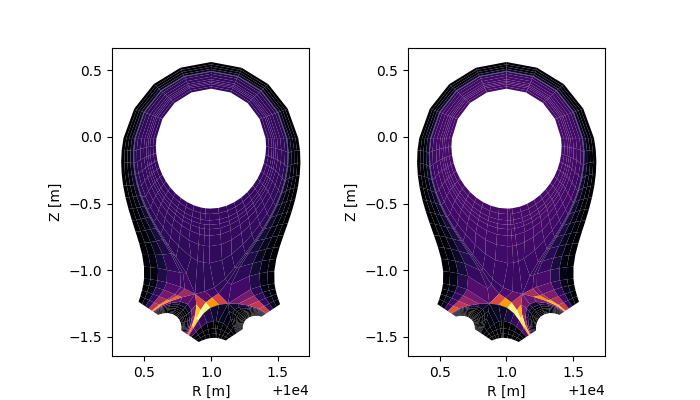

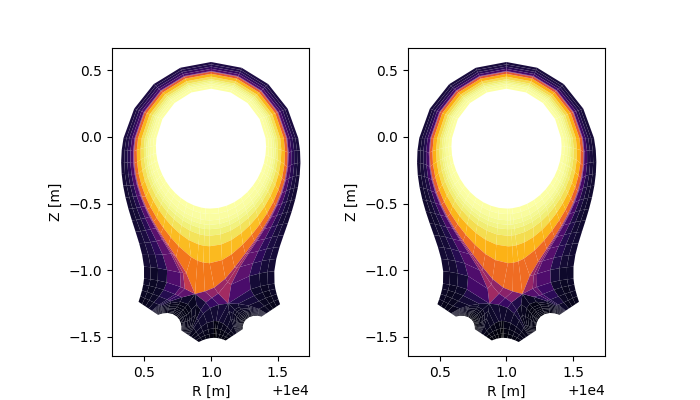

In [3]:
sf15 = UESave("/Users/power8/Documents/04_mastu_modelling/2024_MASTU_shots/works_in_progress/analytic_SFs/analytic_SF15/UEDGE/wip_R0_10000_phionly.hdf5")
sf165 = UESave("/Users/power8/Documents/04_mastu_modelling/2024_MASTU_shots/works_in_progress/analytic_SFs/analytic_SF165/UEDGE/wip_R0_10000_phionly.hdf5")

# fig,ax = plt.subplots(ncols=2, figsize=(7,4))
# _, p1 = dp.plotvar(sf15.vars["te"]/bbb.ev,rm=sf15.rm, zm=sf15.zm,ax=ax[0],show=False, logscale=False)
# _, p2 = dp.plotvar(sf165.vars["te"]/bbb.ev,rm=sf165.rm, zm=sf165.zm,ax=ax[1], logscale=False)
# fig.colorbar(p1, ax=ax[0],cmap="inferno", label="$T_e$ [eV]")
# fig.colorbar(p2, ax=ax[1],cmap="inferno", label="$T_e$ [eV]")
# ax[0].set_title("SF15")
# ax[1].set_title("SF165")
# fig.tight_layout()

fig,ax = plt.subplots(ncols=2, figsize=(7,4))
_, p1 = dp.plotvar(sf15.vars["ni"][:,:,0],rm=sf15.rm, zm=sf15.zm,ax=ax[0],show=False, logscale=False)
_, p2 = dp.plotvar(sf165.vars["ni"][:,:,0],rm=sf165.rm, zm=sf165.zm,ax=ax[1], logscale=False)
fig.colorbar(p1, ax=ax[0],cmap="inferno", label="$n_e$ [m$^{-3}$]")
fig.colorbar(p2, ax=ax[1],cmap="inferno", label="$n_e$ [m$^{-3}$]")
ax[0].set_title("SF15")
ax[1].set_title("SF165")
fig.tight_layout()

fig,ax = plt.subplots(ncols=2, figsize=(7,4))
_, p1 = dp.plotvar(sf15.vars["phi"][:,:],rm=sf15.rm, zm=sf15.zm,ax=ax[0],show=False, logscale=False)
_, p2 = dp.plotvar(sf165.vars["phi"][:,:],rm=sf165.rm, zm=sf165.zm,ax=ax[1], logscale=False)
fig.colorbar(p1, ax=ax[0],cmap="inferno", label="$\phi$ [V]")
fig.colorbar(p2, ax=ax[1],cmap="inferno", label="$\phi$ [V]")
ax[0].set_title("SF15")
ax[1].set_title("SF165")
fig.tight_layout()

In [4]:
# SF15
"""============  Apply settings  ==============="""
us.set_geometry(
    gridfile="/Users/power8/Documents/04_mastu_modelling/2024_MASTU_shots/works_in_progress/analytic_SFs/analytic_SF15/gridfiles/gridue_full_b_R0_10000_c",
    geometry="snowflake15     ",
    isudsym=0,
    nxpt=2,
)
us.set_apdirs("/Users/power8/Documents/01_code/01_uedge/uedge")
us.set_fd_algos()
us.set_bcs(
    iflcore=1,
    tcore=100,
    pcore=10000 * 0.5e6,
    lyni=0.04,
    lyt=0.05,
    ncore=2.3e19,
    recycw=1,
    recycp=1,
)
us.set_flux_limits()
us.set_solver()
us.set_h_gas(fluid_neuts=True)
us.set_initial_conditions()
bbb.b0 = -1
bbb.isphion = 1
bbb.isnewpot = 1
bbb.newbcl = 1
bbb.newbcr = 1
bbb.iphibcc = 2
bbb.rsigpl = 1e-8
us.initial_short_run(update_jac=False)
bbb.difni = 0.5
bbb.kye = 5
bbb.kyi = 5
"""============  ================  ==============="""

hdf5_restore("/Users/power8/Documents/04_mastu_modelling/2024_MASTU_shots/works_in_progress/analytic_SFs/analytic_SF15/UEDGE/wip_R0_10000_phionly.hdf5")
bbb.exmain()

q15, r15 = pp.get_q_plates()

 Reading grid from file:gridue
 Reading grid from file:gridue
 Reading grid from file:gridue
 UEDGE 8.1.1.0                                                                         
 Reading grid from file:gridue
 Read file "gridue                                                                                                                                                                                                  " with runid:                                                              
 iter=    0 fnrm=      4318227381.210598     nfe=      1


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1

Reading uedge.hdf5-style save-file '/Users/power8/Documents/04_mastu_modelling/2024_MASTU_shots/works_in_progress/analytic_SFs/analytic_SF15/UEDGE/wip_R0_10000_phionly.hdf5'.
>>> Save read successfully
 Reading grid

In [5]:
# SF165
"""============  Apply settings  ==============="""
us.set_geometry(
    gridfile="/Users/power8/Documents/04_mastu_modelling/2024_MASTU_shots/works_in_progress/analytic_SFs/analytic_SF165/gridfiles/gridue_full_b_R0_10000_c",
    geometry="snowflake165    ",
    isudsym=0,
    nxpt=2,
)
us.set_apdirs("/Users/power8/Documents/01_code/01_uedge/uedge")
us.set_fd_algos()
us.set_bcs(
    iflcore=1,
    tcore=100,
    pcore=10000 * 0.5e6,
    lyni=0.04,
    lyt=0.05,
    ncore=2.3e19,
    recycw=1,
    recycp=1,
)
us.set_flux_limits()
us.set_solver()
us.set_h_gas(fluid_neuts=True)
us.set_initial_conditions()
bbb.b0 = 1
bbb.isphion = 1
bbb.isnewpot = 1
bbb.newbcl = 1
bbb.newbcr = 1
bbb.iphibcc = 2
bbb.rsigpl = 1e-8
us.initial_short_run(update_jac=False)
bbb.difni = 0.5
bbb.kye = 5
bbb.kyi = 5
"""============  ================  ==============="""

hdf5_restore("/Users/power8/Documents/04_mastu_modelling/2024_MASTU_shots/works_in_progress/analytic_SFs/analytic_SF165/UEDGE/wip_R0_10000_phionly.hdf5")
bbb.exmain()

q165, r165 = pp.get_q_plates()

 Reading grid from file:gridue
 Reading grid from file:gridue
 Reading grid from file:gridue
 Reading grid from file:gridue
 Read file "gridue                                                                                                                                                                                                  " with runid:                                                              
 iter=    0 fnrm=      6980513094.446087     nfe=      1


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1

Reading uedge.hdf5-style save-file '/Users/power8/Documents/04_mastu_modelling/2024_MASTU_shots/works_in_progress/analytic_SFs/analytic_SF165/UEDGE/wip_R0_10000_phionly.hdf5'.
>>> Save read successfully
 Reading grid from file:gridue
 Reading grid from file:gridue
 Read file "gridue                    

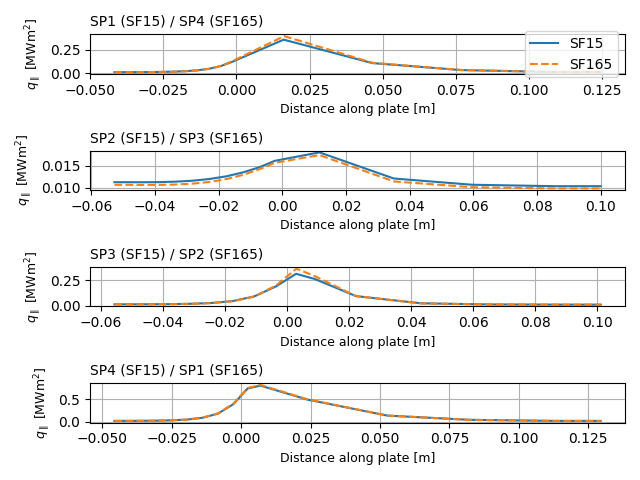

In [6]:
fig,ax = plt.subplots(4)
for i in range(4):
    c1, = ax[i].plot(r15[i],1e-6*q15[i])
    c2, = ax[i].plot(r165[3-i],1e-6*q165[3-i], linestyle="--")
    ax[i].grid()
    ax[i].set_xlabel("Distance along plate [m]", fontsize=9)
    ax[i].set_ylabel("$q_{\parallel}$ [MWm$^2$]", fontsize=9)
    ax[i].set_title("SP{} (SF15) / SP{} (SF165)".format(i+1,4-i), fontsize=10, loc="left")
ax[0].plot([],[],label="SF15", color=c1.get_color())
ax[0].plot([],[],label="SF165", color=c2.get_color(), linestyle="--")
ax[0].legend(loc="right")
fig.tight_layout()

### SF45 / SF135

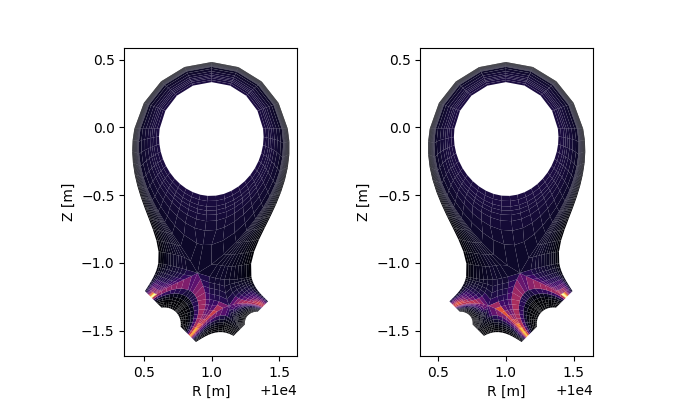

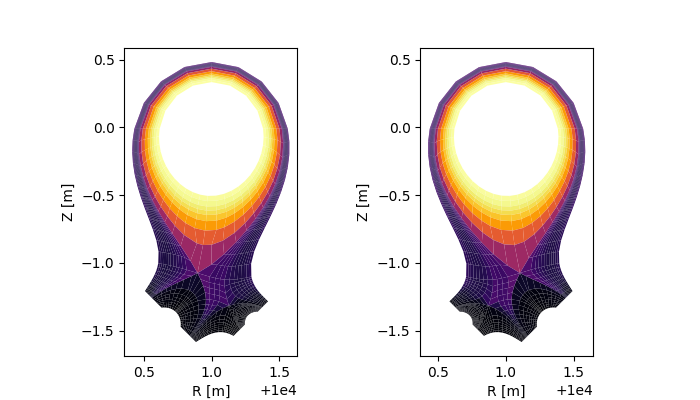

In [7]:
sf45 = UESave("/Users/power8/Documents/04_mastu_modelling/2024_MASTU_shots/works_in_progress/analytic_SFs/analytic_SF45/UEDGE/70x20/phionly_high_R0.hdf5")
sf135 = UESave("/Users/power8/Documents/04_mastu_modelling/2024_MASTU_shots/works_in_progress/analytic_SFs/analytic_SF135/UEDGE/70x20/phionly_high_R0.hdf5")

# fig,ax = plt.subplots(ncols=2, figsize=(7,4))
# _, p1 = dp.plotvar(sf45.vars["te"]/bbb.ev,rm=sf45.rm, zm=sf45.zm,ax=ax[0],show=False, logscale=False)
# _, p2 = dp.plotvar(sf135.vars["te"]/bbb.ev,rm=sf135.rm, zm=sf135.zm,ax=ax[1], logscale=False)
# fig.colorbar(p1, ax=ax[0],cmap="inferno", label="$T_e$ [eV]")
# fig.colorbar(p2, ax=ax[1],cmap="inferno", label="$T_e$ [eV]")
# ax[0].set_title("SF45")
# ax[1].set_title("SF135")
# fig.tight_layout()

fig,ax = plt.subplots(ncols=2, figsize=(7,4))
_, p1 = dp.plotvar(sf45.vars["ni"][:,:,0],rm=sf45.rm, zm=sf45.zm,ax=ax[0],show=False, logscale=False)
_, p2 = dp.plotvar(sf135.vars["ni"][:,:,0],rm=sf135.rm, zm=sf135.zm,ax=ax[1], logscale=False)
fig.colorbar(p1, ax=ax[0],cmap="inferno", label="$n_e$ [m$^{-3}$]")
fig.colorbar(p2, ax=ax[1],cmap="inferno", label="$n_e$ [m$^{-3}$]")
ax[0].set_title("SF45")
ax[1].set_title("SF135")
fig.tight_layout()

fig,ax = plt.subplots(ncols=2, figsize=(7,4))
_, p1 = dp.plotvar(sf45.vars["phi"][:,:],rm=sf45.rm, zm=sf45.zm,ax=ax[0],show=False, logscale=False)
_, p2 = dp.plotvar(sf135.vars["phi"][:,:],rm=sf135.rm, zm=sf135.zm,ax=ax[1], logscale=False)
fig.colorbar(p1, ax=ax[0],cmap="inferno", label="$\phi$ [V]")
fig.colorbar(p2, ax=ax[1],cmap="inferno", label="$\phi$ [V]")
ax[0].set_title("SF45")
ax[1].set_title("SF135")
fig.tight_layout()

In [8]:
"""============  Apply settings  ==============="""
us.set_geometry(
    gridfile="/Users/power8/Documents/04_mastu_modelling/2024_MASTU_shots/works_in_progress/analytic_SFs/analytic_SF45/gridfiles/gridue_70x20_high_R0",
    geometry="snowflake45     ",
    isudsym=0,
    nxpt=2,
)
us.set_apdirs("/Users/power8/Documents/01_code/01_uedge/uedge")
us.set_fd_algos()
us.set_bcs(
    iflcore=1,
    tcore=50,
    pcore=10000 * 2 * 0.5e6,
    lyni=0.01,
    lyt=0.02,
    ncore=2.3e19,
    recycw=1,
    recycp=1,
)
us.set_flux_limits()
us.set_solver()
us.set_h_gas(fluid_neuts=True)
us.set_div_gas_puff_h()
us.set_initial_conditions()
bbb.b0 = 1
bbb.isphion = 1
bbb.isnewpot = 1
bbb.newbcl = 1
bbb.newbcr = 1
bbb.iphibcc = 2
bbb.rsigpl = 1e-8
us.initial_short_run()
bbb.difni = 1
bbb.kye = 5
bbb.kyi = 5
"""============  ================  ==============="""

hdf5_restore("/Users/power8/Documents/04_mastu_modelling/2024_MASTU_shots/works_in_progress/analytic_SFs/analytic_SF45/UEDGE/70x20/phionly_high_R0.hdf5")
bbb.exmain()

q45, r45 = pp.get_q_plates()

 Reading grid from file:gridue
 Reading grid from file:gridue
 Reading grid from file:gridue
 Reading grid from file:gridue
 Read file "gridue                                                                                                                                                                                                  " with runid:                                                              
  Updating Jacobian, npe =                      1
 iter=    0 fnrm=      20.85950476361845     nfe=      1
  Updating Jacobian, npe =                      2
 iter=    1 fnrm=     0.2242184657315049     nfe=      4
 iter=    2 fnrm=     0.3485527733053856E-02 nfe=      8


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1

Reading uedge.hdf5-style save-file '/Users/power8/Documents/04_mastu_modelling/2024_MASTU

In [9]:
"""============  Apply settings  ==============="""
us.set_geometry(
    gridfile="/Users/power8/Documents/04_mastu_modelling/2024_MASTU_shots/works_in_progress/analytic_SFs/analytic_SF135/gridfiles/gridue_70x20_high_R0",
    geometry="snowflake135    ",
    isudsym=0,
    nxpt=2,
)
us.set_apdirs("/Users/power8/Documents/01_code/01_uedge/uedge")
us.set_fd_algos()
us.set_bcs(
    iflcore=1,
    tcore=50,
    pcore=10000 * 2 * 0.5e6,
    lyni=0.01,
    lyt=0.02,
    ncore=2.3e19,
    recycw=1,
    recycp=1,
)
us.set_flux_limits()
us.set_solver()
us.set_h_gas(fluid_neuts=True)
us.set_div_gas_puff_h()
us.set_initial_conditions()
bbb.b0 = -1
bbb.isphion = 1
bbb.isnewpot = 1
bbb.newbcl = 1
bbb.newbcr = 1
bbb.iphibcc = 2
bbb.rsigpl = 1e-8
us.initial_short_run()
bbb.difni = 1
bbb.kye = 5
bbb.kyi = 5
"""============  ================  ==============="""

hdf5_restore("/Users/power8/Documents/04_mastu_modelling/2024_MASTU_shots/works_in_progress/analytic_SFs/analytic_SF135/UEDGE/70x20/phionly_high_R0.hdf5")
bbb.exmain()

q135, r135 = pp.get_q_plates()

 Reading grid from file:gridue
 Reading grid from file:gridue
 Reading grid from file:gridue
 Reading grid from file:gridue
 Read file "gridue                                                                                                                                                                                                  " with runid:                                                              
  Updating Jacobian, npe =                      1
 iter=    0 fnrm=      22.39958861011381     nfe=      1
  Updating Jacobian, npe =                      2
 iter=    1 fnrm=     0.8722535457412091E-01 nfe=      4
 iter=    2 fnrm=     0.3078263566421046E-04 nfe=      6


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1

Reading uedge.hdf5-style save-file '/Users/power8/Documents/04_mastu_modelling/2024_MASTU

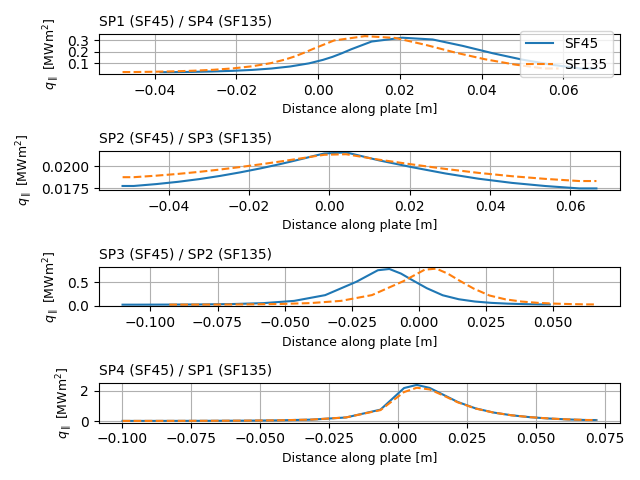

In [10]:
fig,ax = plt.subplots(4)
for i in range(4):
    c1, = ax[i].plot(r45[i],1e-6*q45[i])
    c2, = ax[i].plot(r135[3-i],1e-6*q135[3-i], linestyle="--")
    ax[i].grid()
    ax[i].set_xlabel("Distance along plate [m]", fontsize=9)
    ax[i].set_ylabel("$q_{\parallel}$ [MWm$^2$]", fontsize=9)
    ax[i].set_title("SP{} (SF45) / SP{} (SF135)".format(i+1,4-i), fontsize=10, loc="left")
ax[0].plot([],[],label="SF45", color=c1.get_color())
ax[0].plot([],[],label="SF135", color=c2.get_color(), linestyle="--")
ax[0].legend(loc="right")
fig.tight_layout()

### SF75 / SF105

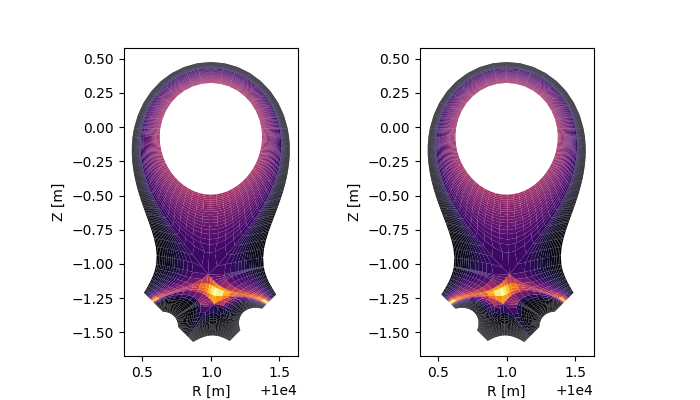

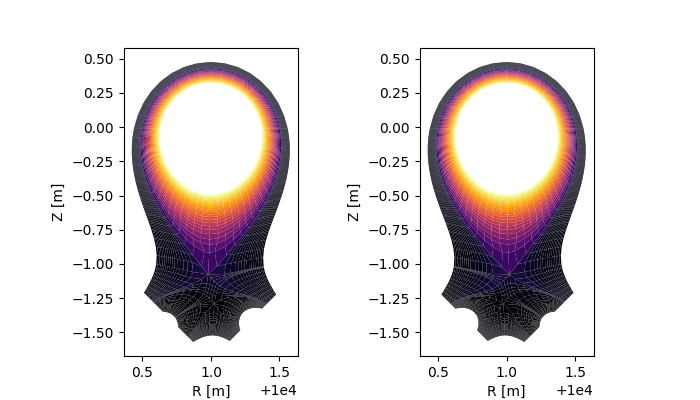

In [15]:
sf75 = UESave("/Users/power8/Documents/04_mastu_modelling/2024_MASTU_shots/works_in_progress/analytic_SFs/analytic_SF75/UEDGE/hires/wip_R0_10000_hires_phionly.hdf5")
sf105 = UESave("/Users/power8/Documents/04_mastu_modelling/2024_MASTU_shots/works_in_progress/analytic_SFs/analytic_SF105/UEDGE/hires/wip_R0_10000_hires_phionly.hdf5")

# fig,ax = plt.subplots(ncols=2, figsize=(7,4))
# _, p1 = dp.plotvar(sf75.vars["te"]/bbb.ev,rm=sf75.rm, zm=sf75.zm,ax=ax[0],show=False, logscale=False)
# _, p2 = dp.plotvar(sf105.vars["te"]/bbb.ev,rm=sf105.rm, zm=sf105.zm,ax=ax[1], logscale=False)
# fig.colorbar(p1, ax=ax[0],cmap="inferno", label="$T_e$ [eV]")
# fig.colorbar(p2, ax=ax[1],cmap="inferno", label="$T_e$ [eV]")
# ax[0].set_title("SF45")
# ax[1].set_title("SF135")
# fig.tight_layout()

fig,ax = plt.subplots(ncols=2, figsize=(7,4))
_, p1 = dp.plotvar(sf75.vars["ni"][:,:,0],rm=sf75.rm, zm=sf75.zm,ax=ax[0],show=False, logscale=False)
_, p2 = dp.plotvar(sf105.vars["ni"][:,:,0],rm=sf105.rm, zm=sf105.zm,ax=ax[1], logscale=False)
fig.colorbar(p1, ax=ax[0],cmap="inferno", label="$n_e$ [m$^{-3}$]")
fig.colorbar(p2, ax=ax[1],cmap="inferno", label="$n_e$ [m$^{-3}$]")
ax[0].set_title("SF75")
ax[1].set_title("SF105")
fig.tight_layout()

fig,ax = plt.subplots(ncols=2, figsize=(7,4))
_, p1 = dp.plotvar(sf75.vars["phi"][:,:],rm=sf75.rm, zm=sf75.zm,ax=ax[0],show=False, logscale=False)
_, p2 = dp.plotvar(sf105.vars["phi"][:,:],rm=sf105.rm, zm=sf105.zm,ax=ax[1], logscale=False)
fig.colorbar(p1, ax=ax[0],cmap="inferno", label="$\phi$ [V]")
fig.colorbar(p2, ax=ax[1],cmap="inferno", label="$\phi$ [V]")
ax[0].set_title("SF75")
ax[1].set_title("SF105")
fig.tight_layout()

In [12]:
"""============  Apply settings  ==============="""
us.set_geometry(
    gridfile="/Users/power8/Documents/04_mastu_modelling/2024_MASTU_shots/works_in_progress/analytic_SFs/analytic_SF75/gridfiles/gridue_88x36_R0_10000",
    geometry="snowflake75     ",
    isudsym=0,
    nxpt=2,
)
us.set_apdirs("/Users/power8/Documents/01_code/01_uedge/uedge")
us.set_fd_algos()
us.set_bcs(
    iflcore=1,
    tcore=50,
    pcore=10000 * 0.5e6,
    lyni=0.02,
    lyt=0.04,
    ncore=2.0e19,
    recycw=0.98,
    recycp=0.98,
)
us.set_flux_limits()
us.set_solver()
us.set_h_gas(fluid_neuts=True)
us.set_div_gas_puff_h()
us.set_initial_conditions()
bbb.b0 = -1
bbb.isphion = 1
bbb.isnewpot = 1
bbb.newbcl = 1
bbb.newbcr = 1
bbb.iphibcc = 2
bbb.rsigpl = 1e-8
us.initial_short_run(update_jac=False)
bbb.difni = 1
bbb.kye = 5
bbb.kyi = 5
"""============  ================  ==============="""

hdf5_restore("/Users/power8/Documents/04_mastu_modelling/2024_MASTU_shots/works_in_progress/analytic_SFs/analytic_SF75/UEDGE/hires/wip_R0_10000_hires_phionly.hdf5")
bbb.exmain()

q75, r75 = pp.get_q_plates()

 Reading grid from file:gridue
 Reading grid from file:gridue
 Reading grid from file:gridue
 Reading grid from file:gridue
 Read file "gridue                                                                                                                                                                                                  " with runid:                                                              
 iter=    0 fnrm=      4390015678.277889     nfe=      1


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1

Reading uedge.hdf5-style save-file '/Users/power8/Documents/04_mastu_modelling/2024_MASTU_shots/works_in_progress/analytic_SFs/analytic_SF75/UEDGE/hires/wip_R0_10000_hires_phionly.hdf5'.
>>> Save read successfully
 Reading grid from file:gridue
 Reading grid from file:gridue
 Read file "gridue         

In [13]:
"""============  Apply settings  ==============="""
us.set_geometry(
    gridfile="/Users/power8/Documents/04_mastu_modelling/2024_MASTU_shots/works_in_progress/analytic_SFs/analytic_SF105/gridfiles/gridue_88x36_R0_10000",
    geometry="snowflake105    ",
    isudsym=0,
    nxpt=2,
)
us.set_apdirs("/Users/power8/Documents/01_code/01_uedge/uedge")
us.set_fd_algos()
us.set_bcs(
    iflcore=1,
    tcore=50,
    pcore=10000 * 0.5e6,
    lyni=0.02,
    lyt=0.04,
    ncore=2.0e19,
    recycw=0.98,
    recycp=0.98,
)
us.set_flux_limits()
us.set_solver()
us.set_h_gas(fluid_neuts=True)
us.set_div_gas_puff_h()
us.set_initial_conditions()
bbb.b0 = 1
bbb.isphion = 1
bbb.isnewpot = 1
bbb.newbcl = 1
bbb.newbcr = 1
bbb.iphibcc = 2
bbb.rsigpl = 1e-8
us.initial_short_run(update_jac=False)
bbb.difni = 1
bbb.kye = 5
bbb.kyi = 5
"""============  ================  ==============="""

hdf5_restore("/Users/power8/Documents/04_mastu_modelling/2024_MASTU_shots/works_in_progress/analytic_SFs/analytic_SF105/UEDGE/hires/wip_R0_10000_hires_phionly.hdf5")
bbb.exmain()

q105, r105 = pp.get_q_plates()

 Reading grid from file:gridue
 Reading grid from file:gridue
 Reading grid from file:gridue
 Reading grid from file:gridue
 Read file "gridue                                                                                                                                                                                                  " with runid:                                                              
 iter=    0 fnrm=      54170112817515.07     nfe=      1


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1

Reading uedge.hdf5-style save-file '/Users/power8/Documents/04_mastu_modelling/2024_MASTU_shots/works_in_progress/analytic_SFs/analytic_SF105/UEDGE/hires/wip_R0_10000_hires_phionly.hdf5'.
>>> Save read successfully
 Reading grid from file:gridue
 Reading grid from file:gridue
 Read file "gridue        

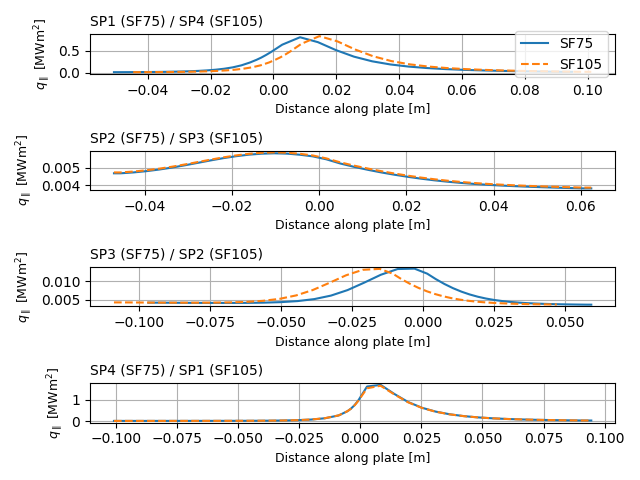

In [14]:
fig,ax = plt.subplots(4)
for i in range(4):
    c1, = ax[i].plot(r75[i],1e-6*q75[i])
    c2, = ax[i].plot(r105[3-i],1e-6*q105[3-i], linestyle="--")
    ax[i].grid()
    ax[i].set_xlabel("Distance along plate [m]", fontsize=9)
    ax[i].set_ylabel("$q_{\parallel}$ [MWm$^2$]", fontsize=9)
    ax[i].set_title("SP{} (SF75) / SP{} (SF105)".format(i+1,4-i), fontsize=10, loc="left")
ax[0].plot([],[],label="SF75", color=c1.get_color())
ax[0].plot([],[],label="SF105", color=c2.get_color(), linestyle="--")
ax[0].legend(loc="right")
fig.tight_layout()